In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [346]:
data = pd.read_csv('dataset.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [347]:
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.291308,0.141796,1459.078483,1388.913312,2795.616429,0.073028,-190.149470,130.296951,-36.344138,33.013050,...,-3.125678,-6.593118,-9.942268,-6.537224,-10.064755,-10.912171,-6.972479,-3.449033,-6.495511,blues
1,0.302346,0.103468,1831.942368,1729.483241,3480.937285,0.094040,-177.869048,118.196916,-17.550673,30.758635,...,-2.420615,-9.339365,-9.939325,-3.909892,-5.570625,-1.839023,-2.778421,-3.046866,-8.115809,blues
2,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
3,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
4,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues


In [348]:
list(data)

['chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [349]:
data.shape

(1000, 27)

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
chroma_stft           1000 non-null float64
rmse                  1000 non-null float64
spectral_centroid     1000 non-null float64
spectral_bandwidth    1000 non-null float64
rolloff               1000 non-null float64
zero_crossing_rate    1000 non-null float64
mfcc1                 1000 non-null float64
mfcc2                 1000 non-null float64
mfcc3                 1000 non-null float64
mfcc4                 1000 non-null float64
mfcc5                 1000 non-null float64
mfcc6                 1000 non-null float64
mfcc7                 1000 non-null float64
mfcc8                 1000 non-null float64
mfcc9                 1000 non-null float64
mfcc10                1000 non-null float64
mfcc11                1000 non-null float64
mfcc12                1000 non-null float64
mfcc13                1000 non-null float64
mfcc14                1000 non-null float64
mfcc15        

no null val is found

In [351]:
# Finding numerical features

numeric_data = data.select_dtypes(include = [np.number])

#Finding categorial features

categorical_data = data.select_dtypes(exclude = [np.number])

In [352]:
print("There are", numeric_data.shape[1], "numeric dataset features")
print("There are", categorical_data.shape[1], "categorical dataset features")

There are 26 numeric dataset features
There are 1 categorical dataset features


# Visuals

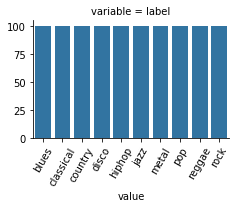

In [353]:
#Plot the count of Categorial Features

f = pd.melt(data, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex=False, sharey=False)
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

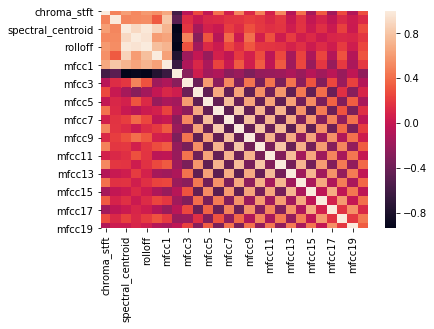

In [354]:
#correltation plot of features on numeric data

corr = numeric_data.corr()
sns.heatmap(corr)

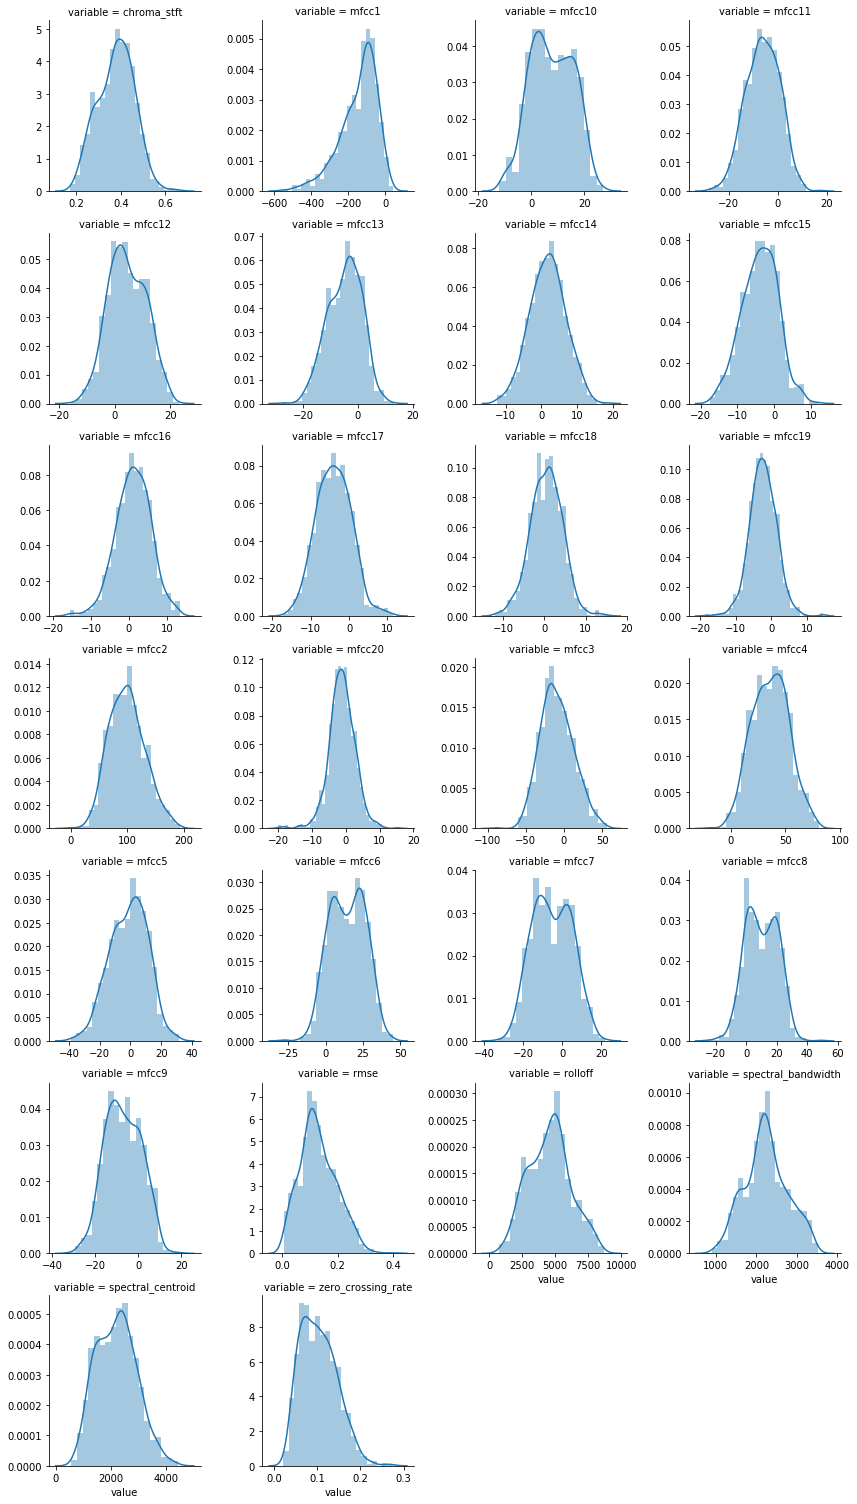

In [308]:
#Distribution of Numerical features

f = pd.melt(data, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap = 4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

In [355]:
data['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [ ]:
data = pd.read_csv('dataset.csv')
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [356]:
data['label'].replace({'blues':0, 'classical':1, 'country':2, 'disco':3, 'hiphop':4, 'jazz':5,
       'metal':6, 'pop':7, 'reggae':8, 'rock':9},inplace=True)

In [357]:
data['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [359]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,RandomizedSearchCV
from xgboost import XGBClassifier
from rfpimp import *
from sklearn.metrics import f1_score,classification_report,confusion_matrix,roc_auc_score,precision_score,recall_score
from tqdm import tqdm
import lightgbm as lgb
import ppscore as pps
import seaborn as sns

In [314]:
#Light GBM

In [387]:
#Scaling using the Standard Scaler
sc_1=StandardScaler()
sc_1.fit(data)
X=pd.DataFrame(sc_1.fit_transform(data.drop('label',1)))
y=data.label

In [388]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-1.069746,0.165526,-1.037943,-1.622672,-1.128402,-0.732044,-0.455857,0.981751,-1.264618,-0.196895,...,-0.266918,-1.131566,-0.291170,-2.341492,-0.547405,-2.449898,-1.526862,-1.934183,-0.298440,-1.408014
1,-0.934579,-0.418279,-0.516895,-0.975292,-0.692997,-0.229528,-0.333280,0.595369,-0.397927,-0.332225,...,-0.844408,-1.026552,-0.736423,-2.340905,-0.008132,-1.467965,0.467949,-0.849649,-0.191301,-1.830446
2,-0.351748,-0.010723,-0.583303,-0.456037,-0.486166,-0.491967,0.308252,0.702674,-0.472090,0.363653,...,-0.337931,0.646276,0.183187,0.792921,-0.265289,-0.086750,0.500287,-0.237192,0.007611,0.603498
3,-0.184484,0.680012,-0.907419,-0.941680,-0.972811,-0.653772,0.536253,1.306278,-0.931003,-0.276376,...,-1.042019,0.196257,-0.666035,-0.572254,-1.097722,0.285748,-0.826553,-0.600707,-0.294285,-0.295113
4,-0.461465,-0.533266,-0.939066,-0.387668,-0.649869,-1.138220,-0.629608,0.780889,0.823297,-0.025115,...,0.067600,0.134823,0.414751,0.486404,-0.439656,-0.046294,0.714738,-0.055190,0.543824,0.424035


In [443]:
def preprocess(data):
    data=pd.read_csv(data)
    data = data.drop(['filename'],axis=1)
    data['label'].replace({'blues':0, 'classical':1, 'country':2, 'disco':3, 'hiphop':4, 'jazz':5,
       'metal':6, 'pop':7, 'reggae':8, 'rock':9},inplace=True)
    #Scaling using the Standard Scaler
    sc_1=StandardScaler()
    sc_1.fit(data)
    X=pd.DataFrame(sc_1.fit_transform(data.drop('label',1)))
    y=data.label
    return X,y

In [444]:
X,y=preprocess('dataset.csv')

In [445]:
#Now splitting our dataset into test and train 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [446]:
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)

In [447]:
#setting up the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=10
params['num_class']=10 #no.of unique values in the target class not inclusive of the end value

In [448]:
#training the model
clf=lgb.train(params,d_train,1000)  #training the model on 100 epocs

In [449]:
y_pred=clf.predict(X_test)

In [450]:
#argmax() method 
y_pred = [np.argmax(line) for line in y_pred]

In [451]:
#using precision score for error metrics
precision_score(y_pred,y_test,average='macro').mean()

0.6383190143190143

In [452]:
#using precision score for error metrics
f1_score(y_pred,y_test,average='macro').mean()

0.6263888613735313

In [453]:
#using precision score for error metrics
recall_score(y_pred,y_test,average='macro')

0.6289178963993038

In [454]:
def getAccuracy(testSet, predictions):
    correct = 0 
    for x in range (len(testSet)):
        if testSet[x]==predictions[x]:
            correct+=1
    return 1.0*correct/len(testSet)

In [455]:
y_test=list(y_test)

In [456]:
accuracy1 = getAccuracy(y_test , y_pred)

In [457]:
accuracy1

0.6266666666666667

In [458]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(truth, pred, average="macro"):

    lb = LabelBinarizer()
    lb.fit(truth)

    truth = lb.transform(truth)
    pred = lb.transform(pred)

    return roc_auc_score(truth, pred, average=average)

In [459]:
multiclass_roc_auc_score(y_test, y_pred, average="macro")

0.7983412560718662

In [430]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))